<a href="https://colab.research.google.com/github/deltorobarba/sciences/blob/master/quantumfinance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Quantum in Finance**

This notebook is accompanying the medium article [How Quantum Computing could accelerate Finance and Economics](https://medium.com/p/80555e80f76b/edit)

In [ ]:
!pip install --quiet cirq
import cirq
import matplotlib.pyplot as plt
import numpy as np

### **Quantum Walks for Risk Management**

E[W(2)] = 124.03194427490234
E[W(5)] = 131.8700408935547


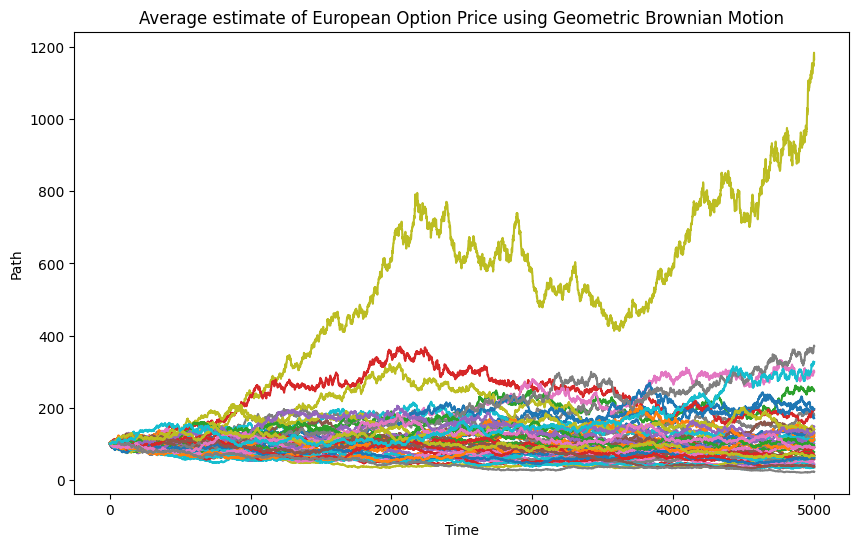

In [ ]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
from jax import random

# paths: Number of paths to simulate.
# count: Number of time steps.
# mean: Mean (drift) of the GBM.
# sigma: Volatility of the GBM.
# S0: Initial stock price.

def geometric_brownian_motion(paths=50, count=5000, mean=0.06, sigma=0.3, S0=100):
    interval = 5 / count
    key = random.PRNGKey(0)  # Random seed for reproducibility

    # Initialize sample matrix with zeros
    sample = jnp.zeros((count + 1, paths))
    sample = sample.at[0, :].set(S0)

    def body_fun(i, val):
        key, sample = val
        key, subkey = random.split(key)
        dW = random.normal(subkey, (paths,)) * jnp.sqrt(interval)
        growth_factor = jnp.exp(interval * (mean - 0.5 * sigma**2) + sigma * dW)
        sample = sample.at[i, :].set(sample[i - 1, :] * growth_factor)
        return key, sample

    key, sample = jax.lax.fori_loop(1, count + 1, body_fun, (key, sample))

    print(f"E[W(2)] = {jnp.mean(sample[2000, :])}")
    print(f"E[W(5)] = {jnp.mean(sample[5000, :])}")

    sample = jax.device_get(sample)  # Transfer data from device to host for plotting

    plt.figure(figsize=(10, 6))
    for path in range(paths):
        plt.plot(sample[:, path])
    plt.title("Average estimate of European Option Price using Geometric Brownian Motion")
    plt.xlabel("Time")
    plt.ylabel("Path")
    plt.show()

geometric_brownian_motion()

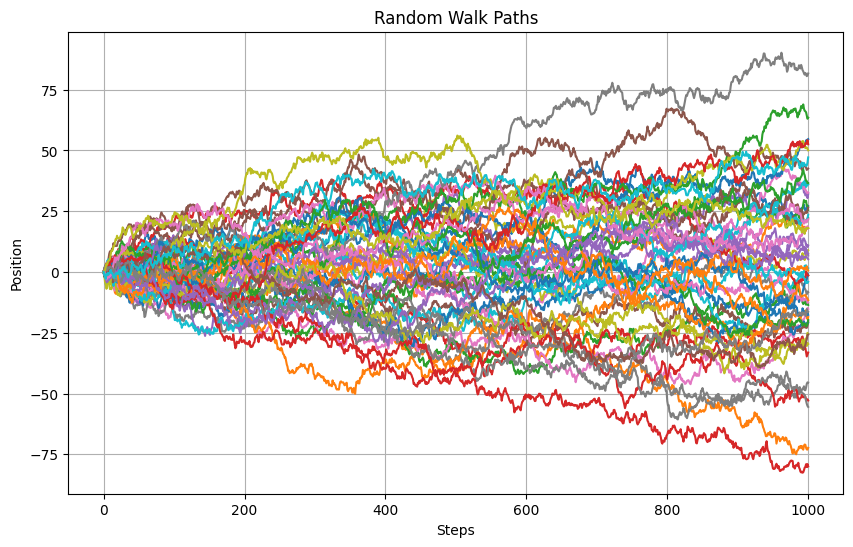

In [ ]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
from jax import random

def random_walk(key, steps, paths):
    # Generate random steps from a normal distribution
    key, subkey = random.split(key)
    steps_array = random.normal(subkey, (steps, paths))

    # Calculate the cumulative sum to get the random walk paths
    random_walk_paths = jnp.cumsum(steps_array, axis=0)

    # Add initial position (0) at the start of each path
    random_walk_paths = jnp.vstack([jnp.zeros(paths), random_walk_paths])

    return random_walk_paths

# Parameters
steps = 1000   # Number of steps
paths = 50     # Number of paths
key = random.PRNGKey(0)  # Random seed for reproducibility

# Simulate random walk
random_walk_paths = random_walk(key, steps, paths)

# Transfer data from device to host for plotting
random_walk_paths = jax.device_get(random_walk_paths)

# Plot the random walk paths
plt.figure(figsize=(10, 6))
for path in range(paths):
    plt.plot(random_walk_paths[:, path])
plt.title("Random Walk Paths")
plt.xlabel("Steps")
plt.ylabel("Position")
plt.grid(True)
plt.show()


https://quantumai.google/cirq/experiments/quantum_walks

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.7/532.7 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.3/69.3 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 596.5/596.5 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.6/202.6 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 51.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 51.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 15.2 MB/s eta

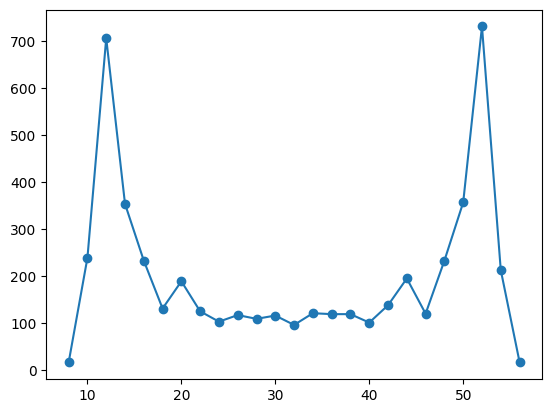

In [ ]:
!pip install --quiet cirq
import cirq
from matplotlib import pyplot as plt

number_qubits = 7
iterator = 30
sample_number = 5000
qubits = cirq.GridQubit.rect(1, number_qubits)

def initial_state():
    yield cirq.X.on(cirq.GridQubit(0, 1))
    yield cirq.H.on(cirq.GridQubit(0, number_qubits))
    yield cirq.S.on(cirq.GridQubit(0, number_qubits))

def walk_step():

    # "Flip" the coin vector

    yield cirq.H.on(cirq.GridQubit(0, number_qubits))

    # Implement the Addition Operator

    yield cirq.X.on(cirq.GridQubit(0, number_qubits))

    for i in range(number_qubits, 0, -1):

        controls = [cirq.GridQubit(0, v) for v in range(number_qubits, i-1, -1)]
        yield cirq.X.on(cirq.GridQubit(0, i-1)).controlled_by(*controls)
        if (i > 1):
            yield cirq.X.on(cirq.GridQubit(0, i-1))

    yield cirq.X.on(cirq.GridQubit(0, number_qubits))

    # Implement the Subtraction Operator

    for i in range(1, number_qubits+1):

        controls = [cirq.GridQubit(0, v) for v in range(number_qubits, i-1, -1)]
        yield cirq.X.on(cirq.GridQubit(0, i-1)).controlled_by(*controls)
        if (i < number_qubits):
            yield cirq.X.on(cirq.GridQubit(0, i))


def generate_walk(number_qubits, iterator, sample_number):

    circuit = cirq.Circuit()

    circuit.append(initial_state())
    for j in range(iterator):
        circuit.append(walk_step())
    circuit.append(cirq.measure(*qubits, key='x'))

    simulator = cirq.Simulator()
    result = simulator.run(circuit, repetitions=sample_number)
    final = result.histogram(key='x')

    return final


def graph(final):

    x_arr = list(final.keys())
    y_arr = [dict(final)[j] for j in dict(final).keys()]

    x_arr_final = []
    y_arr_final = []

    while (len(x_arr) > 0):

        x_arr_final.append(min(x_arr))
        y_arr_final.append(y_arr[x_arr.index(min(x_arr))])
        holder = x_arr.index(min(x_arr))
        del x_arr[holder]
        del y_arr[holder]

    plt.plot(x_arr_final, y_arr_final)
    plt.scatter(x_arr_final, y_arr_final)
    plt.show()

final = generate_walk(number_qubits, iterator, sample_number)
graph(final)

### **Topological Data Analysis**

https://giotto-ai.github.io/gtda-docs/latest/notebooks/topology_time_series.html

In [ ]:
!pip install --quiet giotto-tda
import numpy as np
import plotly.graph_objects as go

x_nonperiodic = np.linspace(0, 50, 1000)
y_nonperiodic = np.cos(x_nonperiodic) + np.cos(np.pi * x_nonperiodic)


fig = go.Figure(data=go.Scatter(x=x_nonperiodic, y=y_nonperiodic))
fig.update_layout(xaxis_title="Timestamp", yaxis_title="Amplitude")
fig.show()

# Create time delay embedding for this signal and visualise the resulting point cloud

from gtda.time_series import SingleTakensEmbedding
from gtda.plotting import plot_point_cloud

embedding_dimension_nonperiodic = 3
embedding_time_delay_nonperiodic = 16
stride = 3

embedder_nonperiodic = SingleTakensEmbedding(
    parameters_type="fixed",
    n_jobs=2,
    time_delay=embedding_time_delay_nonperiodic,
    dimension=embedding_dimension_nonperiodic,
    stride=stride,
)

y_nonperiodic_embedded = embedder_nonperiodic.fit_transform(y_nonperiodic)

plot_point_cloud(y_nonperiodic_embedded)

# From time delay embeddings to persistence diagrams
y_periodic_embedded = y_periodic_embedded[None, :, :]
y_nonperiodic_embedded = y_nonperiodic_embedded[None, :, :]

from gtda.homology import VietorisRipsPersistence

# 0 - connected components, 1 - loops, 2 - voids
homology_dimensions = [0, 1, 2]

periodic_persistence = VietorisRipsPersistence(
    homology_dimensions=homology_dimensions, n_jobs=6
)
print("Persistence diagram for periodic signal")
periodic_persistence.fit_transform_plot(y_periodic_embedded)

nonperiodic_persistence = VietorisRipsPersistence(
    homology_dimensions=homology_dimensions, n_jobs=6
)
print("Persistence diagram for nonperiodic signal")
nonperiodic_persistence.fit_transform_plot(y_nonperiodic_embedded);

Persistence diagram for periodic signal


Persistence diagram for nonperiodic signal


### **HHL**

https://github.com/quantumlib/Cirq/blob/main/examples/hhl.py

In [ ]:
# pylint: disable=wrong-or-nonexistent-copyright-notice
"""Demonstrates the algorithm for solving linear systems by Harrow, Hassidim, Lloyd (HHL).

The HHL algorithm solves a system of linear equations, specifically equations of the form Ax = b,
where A is a Hermitian matrix, b is a known vector, and x is the unknown vector. To solve on a
quantum system, b must be rescaled to have magnitude 1, and the equation becomes:

|x> = A**-1 |b> / || A**-1 |b> ||

The algorithm uses 3 sets of qubits: a single ancilla qubit, a register (to store eigenvalues of
A), and memory qubits (to store |b> and |x>). The following are performed in order:
1) Quantum phase estimation to extract eigenvalues of A
2) Controlled rotations of ancilla qubit
3) Uncomputation with inverse quantum phase estimation

For details about the algorithm, please refer to papers in the REFERENCE section below. The
following description uses variables defined in the HHL paper.

This example is an implementation of the HHL algorithm for arbitrary 2x2 Hermitian matrices. The
output of the algorithm are the expectation values of Pauli observables of |x>. Note that the
accuracy of the result depends on the following factors:
* Register size
* Choice of parameters C and t

The result is perfect if
* Each eigenvalue of the matrix is in the form

  2π/t * k/N,

  where 0≤k<N, and N=2^n, where n is the register size. In other words, k is a value that can be
  represented exactly by the register.
* C ≤ 2π/t * 1/N, the smallest eigenvalue that can be stored in the circuit.

The result is good if the register size is large enough such that for every pair of eigenvalues,
the ratio can be approximated by a pair of possible register values. Let s be the scaling factor
from possible register values to eigenvalues. One way to set t is

t = 2π/(sN)

For arbitrary matrices, because properties of their eigenvalues are typically unknown, parameters C
and t are fine-tuned based on their condition number.


=== REFERENCE ===
Harrow, Aram W. et al. Quantum algorithm for solving linear systems of
equations (the HHL paper)
https://arxiv.org/abs/0811.3171

Coles, Eidenbenz et al. Quantum Algorithm Implementations for Beginners
https://arxiv.org/abs/1804.03719

=== CIRCUIT ===
Example of circuit with 2 register qubits.

(0, 0): ─────────────────────────Ry(θ₄)─Ry(θ₁)─Ry(θ₂)─Ry(θ₃)──────────────M──
                     ┌──────┐    │      │      │      │ ┌───┐
(1, 0): ─H─@─────────│      │──X─@──────@────X─@──────@─│   │─────────@─H────
           │         │QFT^-1│    │      │      │      │ │QFT│         │
(2, 0): ─H─┼─────@───│      │──X─@────X─@────X─@────X─@─│   │─@───────┼─H────
           │     │   └──────┘                           └───┘ │       │
(3, 0): ───e^iAt─e^2iAt───────────────────────────────────────e^-2iAt─e^-iAt─

Note: QFT in the above diagram omits swaps, which are included implicitly by
reversing qubit order for phase kickbacks.
"""

import math
import numpy as np
import sympy
import cirq


class PhaseEstimation(cirq.Gate):
    """A gate for Quantum Phase Estimation.

    The last qubit stores the eigenvector; all other qubits store the estimated phase,
    in big-endian.

    Args:
        num_qubits: The number of qubits of the unitary.
        unitary: The unitary gate whose phases will be estimated.
    """

    def __init__(self, num_qubits, unitary):
        self._num_qubits = num_qubits
        self.U = unitary

    def num_qubits(self):
        return self._num_qubits

    def _decompose_(self, qubits):
        qubits = list(qubits)
        yield cirq.H.on_each(*qubits[:-1])
        yield PhaseKickback(self.num_qubits(), self.U)(*qubits)
        yield cirq.qft(*qubits[:-1], without_reverse=True) ** -1


class HamiltonianSimulation(cirq.EigenGate):
    """A gate that represents e^iAt.

    This EigenGate + np.linalg.eigh() implementation is used here purely for demonstrative
    purposes. If a large matrix is used, the circuit should implement actual Hamiltonian
    simulation, by using the linear operators framework in Cirq, for example.
    """

    def __init__(self, A, t, exponent=1.0):
        cirq.EigenGate.__init__(self, exponent=exponent)
        self.A = A
        self.t = t
        ws, vs = np.linalg.eigh(A)
        self.eigen_components = []
        for w, v in zip(ws, vs.T):
            theta = w * t / math.pi
            P = np.outer(v, np.conj(v))
            self.eigen_components.append((theta, P))

    def _num_qubits_(self) -> int:
        return 1

    def _with_exponent(self, exponent):
        return HamiltonianSimulation(self.A, self.t, exponent)

    def _eigen_components(self):
        return self.eigen_components


class PhaseKickback(cirq.Gate):
    """A gate for the phase kickback stage of Quantum Phase Estimation.

    It consists of a series of controlled e^iAt gates with the memory qubit as the target and
    each register qubit as the control, raised to the power of 2 based on the qubit index.
    unitary is the unitary gate whose phases will be estimated.
    """

    def __init__(self, num_qubits, unitary):
        super(PhaseKickback, self)
        self._num_qubits = num_qubits
        self.U = unitary

    def num_qubits(self):
        return self._num_qubits

    def _decompose_(self, qubits):
        qubits = list(qubits)
        memory = qubits.pop()
        for i, qubit in enumerate(qubits):
            yield cirq.ControlledGate(self.U ** (2**i))(qubit, memory)


class EigenRotation(cirq.Gate):
    """Perform a rotation on an ancilla equivalent to division by eigenvalues of a matrix.

    EigenRotation performs the set of rotation on the ancilla qubit equivalent to division on the
    memory register by each eigenvalue of the matrix. The last qubit is the ancilla qubit; all
    remaining qubits are the register, assumed to be big-endian.

    It consists of a controlled ancilla qubit rotation for each possible value that can be
    represented by the register. Each rotation is a Ry gate where the angle is calculated from
    the eigenvalue corresponding to the register value, up to a normalization factor C.
    """

    def __init__(self, num_qubits, C, t):
        super(EigenRotation, self)
        self._num_qubits = num_qubits
        self.C = C
        self.t = t
        self.N = 2 ** (num_qubits - 1)

    def num_qubits(self):
        return self._num_qubits

    def _decompose_(self, qubits):
        for k in range(self.N):
            kGate = self._ancilla_rotation(k)

            # xor's 1 bits correspond to X gate positions.
            xor = k ^ (k - 1)

            for q in qubits[-2::-1]:
                # Place X gates
                if xor % 2 == 1:
                    yield cirq.X(q)
                xor >>= 1

                # Build controlled ancilla rotation
                kGate = cirq.ControlledGate(kGate)

            yield kGate(*qubits)

    def _ancilla_rotation(self, k):
        if k == 0:
            k = self.N
        theta = 2 * math.asin(self.C * self.N * self.t / (2 * math.pi * k))
        return cirq.ry(theta)


def hhl_circuit(A, C, t, register_size, *input_prep_gates):
    """Constructs the HHL circuit.

    Args:
        A: The input Hermitian matrix.
        C: Algorithm parameter, see above.
        t: Algorithm parameter, see above.
        register_size: The size of the eigenvalue register.
        *input_prep_gates: A list of gates to be applied to |0> to generate the desired input
            state |b>.

    Returns:
        The HHL circuit. The ancilla measurement has key 'a' and the memory measurement is in key
        'm'.  There are two parameters in the circuit, `exponent` and `phase_exponent` corresponding
        to a possible rotation  applied before the measurement on the memory with a
        `cirq.PhasedXPowGate`.
    """

    ancilla = cirq.LineQubit(0)
    # to store eigenvalues of the matrix
    register = [cirq.LineQubit(i + 1) for i in range(register_size)]
    # to store input and output vectors
    memory = cirq.LineQubit(register_size + 1)

    c = cirq.Circuit()
    hs = HamiltonianSimulation(A, t)
    pe = PhaseEstimation(register_size + 1, hs)
    c.append([gate(memory) for gate in input_prep_gates])
    c.append(
        [
            pe(*(register + [memory])),
            EigenRotation(register_size + 1, C, t)(*(register + [ancilla])),
            pe(*(register + [memory])) ** -1,
            cirq.measure(ancilla, key='a'),
        ]
    )

    c.append(
        [
            cirq.PhasedXPowGate(
                exponent=sympy.Symbol('exponent'), phase_exponent=sympy.Symbol('phase_exponent')
            )(memory),
            cirq.measure(memory, key='m'),
        ]
    )

    return c


def simulate(circuit):
    simulator = cirq.Simulator()

    # Cases for measuring X, Y, and Z (respectively) on the memory qubit.
    params = [
        {'exponent': 0.5, 'phase_exponent': -0.5},
        {'exponent': 0.5, 'phase_exponent': 0},
        {'exponent': 0, 'phase_exponent': 0},
    ]

    results = simulator.run_sweep(circuit, params, repetitions=5000)

    for label, result in zip(('X', 'Y', 'Z'), list(results)):
        # Only select cases where the ancilla is 1.
        # TODO: optimize using amplitude amplification algorithm.
        # Github issue: https://github.com/quantumlib/Cirq/issues/2216
        expectation = 1 - 2 * np.mean(result.measurements['m'][result.measurements['a'] == 1])
        print(f'{label} = {expectation}')


def main():
    """The main program loop.

    Simulates HHL with matrix input, and outputs Pauli observables of the resulting qubit state |x>.
    Expected observables are calculated from the expected solution |x>.
    """

    # Eigendecomposition:
    #   (4.537, [-0.971555, -0.0578339+0.229643j])
    #   (0.349, [-0.236813, 0.237270-0.942137j])
    # |b> = (0.64510-0.47848j, 0.35490-0.47848j)
    # |x> = (-0.0662724-0.214548j, 0.784392-0.578192j)
    A = np.array(
        [
            [4.30213466 - 6.01593490e-08j, 0.23531802 + 9.34386156e-01j],
            [0.23531882 - 9.34388383e-01j, 0.58386534 + 6.01593489e-08j],
        ]
    )
    t = 0.358166 * math.pi
    register_size = 4
    input_prep_gates = [cirq.rx(1.276359), cirq.rz(1.276359)]
    expected = (0.144130, 0.413217, -0.899154)

    # Set C to be the smallest eigenvalue that can be represented by the
    # circuit.
    C = 2 * math.pi / (2**register_size * t)

    # Simulate circuit.
    print("Expected observable outputs:")
    print("X =", expected[0])
    print("Y =", expected[1])
    print("Z =", expected[2])
    print("Actual: ")
    simulate(hhl_circuit(A, C, t, register_size, *input_prep_gates))


if __name__ == '__main__':
    main()

### **Quantum Phase Estimation**

https://quantumai.google/cirq/experiments/textbook_algorithms#phase_estimation

In [ ]:
def phase_estimation(theta, n_bits, n_reps=10, prepare_eigenstate_gate=cirq.X):
    # Define qubit registers.
    qubits = cirq.LineQubit.range(n_bits)
    u_bit = cirq.NamedQubit('u')

    # Define the unitary U.
    U = cirq.Z ** (2 * theta)

    # Start with Hadamards on every qubit.
    phase_estimator = cirq.Circuit(cirq.H.on_each(*qubits))

    # Do the controlled powers of the unitary U.
    for i, bit in enumerate(qubits):
        phase_estimator.append(cirq.ControlledGate(U).on(bit, u_bit) ** (2 ** (n_bits - 1 - i)))

    # Do the inverse QFT.
    phase_estimator.append(make_qft_inverse(qubits[::-1]))

    # Add measurements.
    phase_estimator.append(cirq.measure(*qubits, key='m'))

    # Gate to choose the initial state for the u_bit. Placing X here chooses the |1> state.
    phase_estimator.insert(0, prepare_eigenstate_gate.on(u_bit))

    # Code to simulate measurements
    sim = cirq.Simulator()
    result = sim.run(phase_estimator, repetitions=n_reps)

    # Convert measurements into estimates of theta
    theta_estimates = np.sum(2**np.arange(n_bits)*result.measurements['m'], axis=1)/2**n_bits

    return theta_estimates

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.7/532.7 kB 37.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.3/69.3 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 596.5/596.5 kB 41.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.6/202.6 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 43.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 56.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 50.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 10.9 MB/s eta 

In [ ]:
def make_qft_inverse(qubits):
    """Generator for the inverse QFT on a list of qubits."""
    qreg = list(qubits)[::-1]
    while len(qreg) > 0:
        q_head = qreg.pop(0)
        yield cirq.H(q_head)
        for i, qubit in enumerate(qreg):
            yield (cirq.CZ ** (-1 / 2 ** (i + 1)))(qubit, q_head)

In [ ]:
"""Analyze convergence vs n_bits."""
# Set the value of theta. Try different values.
theta = 0.123456

max_nvals = 16
nvals = np.arange(1, max_nvals, step=1)

# Get the estimates at each value of n.
estimates = []
for n in nvals:
    estimate = phase_estimation(theta=theta, n_bits=n, n_reps=1)[0]
    estimates.append(estimate)

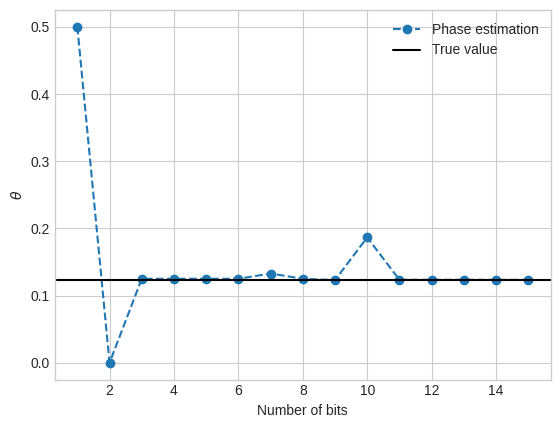

In [ ]:
"""Plot the results."""
plt.style.use("seaborn-v0_8-whitegrid")

plt.plot(nvals, estimates, "--o", label="Phase estimation")
plt.axhline(theta, label="True value", color="black")

plt.legend()
plt.xlabel("Number of bits")
plt.ylabel(r"$\theta$");

### **TensorNetworks**

In [ ]:
!pip install --quiet tensornetwork
import numpy as np
import tensornetwork as tn

# Create the nodes
a = tn.Node(np.ones((10,)))
b = tn.Node(np.ones((10,)))
edge = a[0] ^ b[0] # Equal to tn.connect(a[0], b[0])
final_node = tn.contract(edge)
print(final_node.tensor) # Should print 10.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.3/364.3 kB 4.8 MB/s eta 0:00:00
10.0
